# Retail strategy and analytics

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Creating Dataframes for Customer and Transaction data

In [112]:
customer=pd.read_csv("C:/Users/visas/Downloads/QVI_purchase_behaviour.csv")

In [113]:
transaction=pd.read_excel("C:/Users/visas/Downloads/QVI_transaction_data.xlsx")

## Examining Transaction Data

In [114]:
transaction.shape 

(264836, 8)

In [115]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [116]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


Observation : Date is stored as an integer

##### Converting Integer data to date data type

In [117]:
transaction['DATE']=pd.to_datetime(transaction['DATE'],unit='D',origin='1899-12-30') ### excelInteger dates begin on 30 Dec 1899

In [118]:
transaction.head(1)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0


In [119]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


##### Checking for null values

In [120]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Observation: There are no null values

##### Count of unique stores

In [121]:
transaction['STORE_NBR'].nunique()

272

##### Exploring PROD_NAME column

In [122]:
transaction['PROD_NAME'].nunique()

114

Obeservation: There are a total of 114 unique Products

In [251]:
transaction['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  C

##### Commom words in the PROD_NAME Column

In [124]:
import collections
import itertools

In [125]:
l1=collections.Counter(itertools.chain.from_iterable(v.split(' ')for v in transaction['PROD_NAME']  ))

In [129]:
l2 = pd.DataFrame.from_dict(l1, orient='index').reset_index()

In [130]:
l2.head() # Common words and their count as a dataframe

,index,0
0,Natural,6050
1,Chip,18645
2,,504838
3,Compny,1468
4,SeaSalt175g,1468


In [131]:
l2.columns=['word','count']

In [132]:
l2.head()

,word,count
0,Natural,6050
1,Chip,18645
2,,504838
3,Compny,1468
4,SeaSalt175g,1468


##### Removing words that have numbers and &

In [133]:
l2[l2['word'].str.contains('&')].index
        
        
        

Int64Index([ 16,  19,  31,  44,  53,  78,  83,  93, 145, 149, 150, 155, 161,
            166, 178, 189, 196, 199, 209, 210, 213],
           dtype='int64')

In [134]:
l2.drop( [16,  19,  31,  44,  53,  78,  83,  93, 145, 149, 150, 155, 161,
            166, 178, 189, 196, 199, 209, 210, 213],axis=0,inplace=True)

In [135]:
l2[l2['word'].str.contains('1')].index

Int64Index([4, 8, 14, 21, 38, 45, 66, 71, 82, 91, 100, 127, 132, 134, 170, 171,
            180],
           dtype='int64')

In [136]:
l2.drop([4, 8, 14, 21, 38, 45, 66, 71, 82, 91, 100, 127, 132, 134, 170, 171,
            180],axis=0,inplace=True)

In [137]:
l2[l2['word'].str.contains('2')].index

Int64Index([50, 58, 105, 138, 157], dtype='int64')

In [138]:
l2.drop([50, 58, 105, 138, 157],axis=0,inplace=True)

In [139]:
l2[l2['word'].str.contains('3')].index

Int64Index([29, 33, 104, 141], dtype='int64')

In [140]:
l2.drop([29, 33, 104, 141],axis=0,inplace=True)

In [141]:
l2[l2['word'].str.contains('7')].index

Int64Index([203], dtype='int64')

In [142]:
l2.drop(203,axis=0,inplace=True)

In [143]:
l2[l2['word'].str.contains('9')].index

Int64Index([190], dtype='int64')

In [144]:
l2.drop(190,axis=0,inplace=True)

In [145]:
pd.set_option('display.max_rows', 200)

In [253]:
l2.head()

,word,count
0,Natural,6050
1,Chip,18645
2,,504838
3,Compny,1468
5,CCs,4551


In [254]:
#l2['word'].unique()

In [147]:
l2.sort_values('count',ascending=False).head()

,word,count
2,,504838
12,Chips,49770
17,Kettle,41288
9,Smiths,28860
30,Salt,27976


##### Removing  Transactions from Salsa sales

In [148]:
transaction[transaction['PROD_NAME'].str.contains('Salsa')].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6


Observation : 18094 Transactions are from Salsa sales

In [149]:
transaction[transaction['PROD_NAME'].str.contains('Salsa')]['PROD_NAME'].value_counts()

Old El Paso Salsa   Dip Chnky Tom Ht300g    3125
Old El Paso Salsa   Dip Tomato Med 300g     3114
Old El Paso Salsa   Dip Tomato Mild 300g    3085
Woolworths Mild     Salsa 300g              1491
Doritos Salsa Mild  300g                    1472
Smiths Crinkle Cut  Tomato Salsa 150g       1470
Red Rock Deli SR    Salsa & Mzzrlla 150g    1458
Doritos Salsa       Medium 300g             1449
Woolworths Medium   Salsa 300g              1430
Name: PROD_NAME, dtype: int64

In [150]:
transaction.drop(transaction[transaction['PROD_NAME'].str.contains('Salsa')].index,axis=0,inplace=True)

##### Initial Summary

In [151]:
transaction.describe()[['PROD_QTY','TOT_SALES']]

,PROD_QTY,TOT_SALES
count,246742.000000,246742.000000
mean,1.908062,7.321322
std,0.659831,3.077828
min,1.000000,1.700000
25%,2.000000,5.800000
50%,2.000000,7.400000
75%,2.000000,8.800000
max,200.000000,650.000000


##### Looking for Outliers in PROD_QTY column

<AxesSubplot:xlabel='PROD_QTY'>

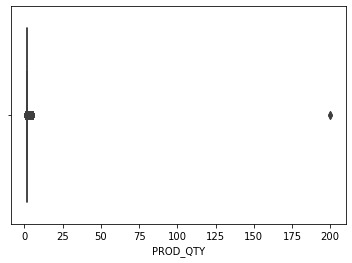

In [152]:
sns.boxplot(data=transaction,x='PROD_QTY')

Observation : There is one outlier in PROD_QTY with a value of 200

In [153]:
q1,q3=np.percentile(transaction['PROD_QTY'],[25,75])

In [154]:
q1

2.0

In [155]:
q3

2.0

In [156]:
upper_bound=q3+(1.5*q3)
upper_bound

5.0

In [157]:
lower_bound=q1-(1.5*q1)
lower_bound

-1.0

In [158]:
transaction[transaction['PROD_QTY']>upper_bound]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Obeservation: There are two records that are outliers with the PROD_QTY column with a quantity of 200.

In [159]:
transaction[transaction['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Observation : The customer with the loyalty card number 226000 has only two transactions .He might be commercial customer.
              We will remove these 2 transactions for further analysis

In [160]:
transaction.drop(transaction[transaction['LYLTY_CARD_NBR']==226000].index,axis=0,inplace=True)

In [161]:
transaction['TOT_SALES'].describe()

count    246740.000000
mean          7.316113
std           2.474897
min           1.700000
25%           5.800000
50%           7.400000
75%           8.800000
max          29.500000
Name: TOT_SALES, dtype: float64

<AxesSubplot:xlabel='TOT_SALES'>

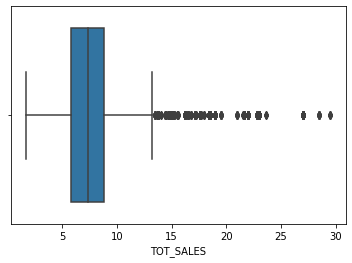

In [162]:
sns.boxplot(data=transaction,x='TOT_SALES')

In [163]:
t1,t3=np.percentile(transaction['TOT_SALES'],[25,75])

In [164]:
t1

5.8

In [165]:
t3

8.8

In [166]:
upper_bound=t3+(1.5*t3)
upper_bound

22.0

In [167]:
lower_bound=t1-(1.5*t1)
lower_bound

-2.8999999999999995

In [168]:
transaction[transaction['TOT_SALES']>upper_bound].count()

DATE              123
STORE_NBR         123
LYLTY_CARD_NBR    123
TXN_ID            123
PROD_NBR          123
PROD_NAME         123
PROD_QTY          123
TOT_SALES         123
dtype: int64

##### Number of transactions by date

In [169]:
transaction['DATE'].max()

Timestamp('2019-06-30 00:00:00')

In [170]:
transaction['DATE'].min()

Timestamp('2018-07-01 00:00:00')

Observation : This is a dataset with transactions from Jul 1 2018 to Jun 30 2019 

In [255]:
transaction.groupby('DATE').count().head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size,Brand_Name
DATE,,,,,,,,,
2018-07-01,663,663,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660,660,660


Observation: There is 1 missing date

##### Creating a sequence of dates from Jul 1 2018 to jun 30 2019

In [173]:
date_seq=pd.date_range('2018-07-01', periods=365)

In [174]:
date_seq1=pd.DataFrame(data=date_seq,columns=['DATE'])

In [175]:
transaction1=transaction.merge(date_seq1,how='right',on='DATE')

In [176]:
transaction1['DATE'].min()

Timestamp('2018-07-01 00:00:00')

In [177]:
transaction1['DATE'].max()

Timestamp('2019-06-30 00:00:00')

In [178]:
transaction1.groupby('DATE').count().head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660


Observation : we have merged created date sequence with the transaction record and have all the dates in the year for analysis

In [179]:
transaction1.isnull().sum()

DATE              0
STORE_NBR         1
LYLTY_CARD_NBR    1
TXN_ID            1
PROD_NBR          1
PROD_NAME         1
PROD_QTY          1
TOT_SALES         1
dtype: int64

#####  Transactions Over Time

In [183]:
d1=transaction.groupby('DATE').size().reset_index()

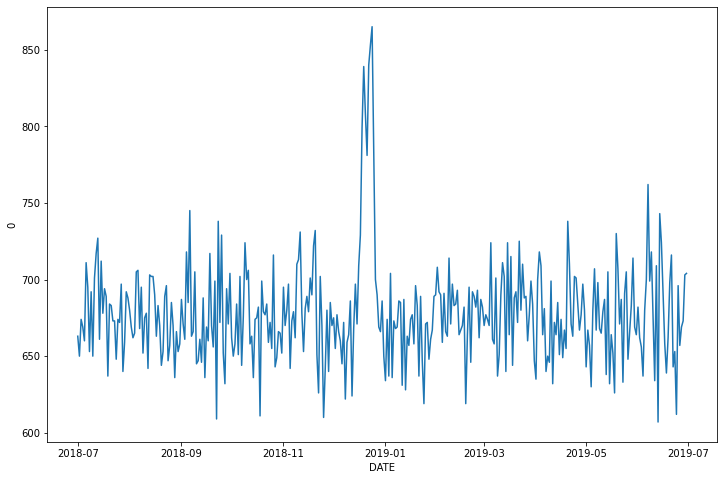

In [190]:
plt.figure(figsize=(12,8))
sns.lineplot(data=d1,x='DATE',y=0)
plt.show()

Observation: Sales increased leading up to Christmas

##### Filtering to look at December Transactions

In [191]:
transaction[(transaction['DATE']>='2018-12-01') & (transaction['DATE']<='2018-12-31')]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
224,2018-12-14,2,2256,866,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7
232,2018-12-17,2,2454,1071,34,Pringles Slt Vingar 134g,1,3.7
265,2018-12-12,4,4074,2980,4,Dorito Corn Chp Supreme 380g,2,13.0
284,2018-12-02,4,4371,4315,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2
285,2018-12-24,4,4371,4316,78,Thins Chips Salt & Vinegar 175g,2,6.6
...,...,...,...,...,...,...,...,...
264751,2018-12-20,268,268315,264753,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7
264775,2018-12-01,269,269204,266270,58,Red Rock Deli Chikn&Garlic Aioli 150g,2,5.4
264788,2018-12-18,270,270002,266609,26,Pringles Sweet&Spcy BBQ 134g,2,7.4
264812,2018-12-16,271,271051,268509,62,Pringles Mystery Flavour 134g,2,7.4


In [192]:
dec_2018=transaction[(transaction['DATE']>='2018-12-01') & (transaction['DATE']<='2018-12-31')]

In [197]:
d2=dec_2018.groupby('DATE').size().reset_index()

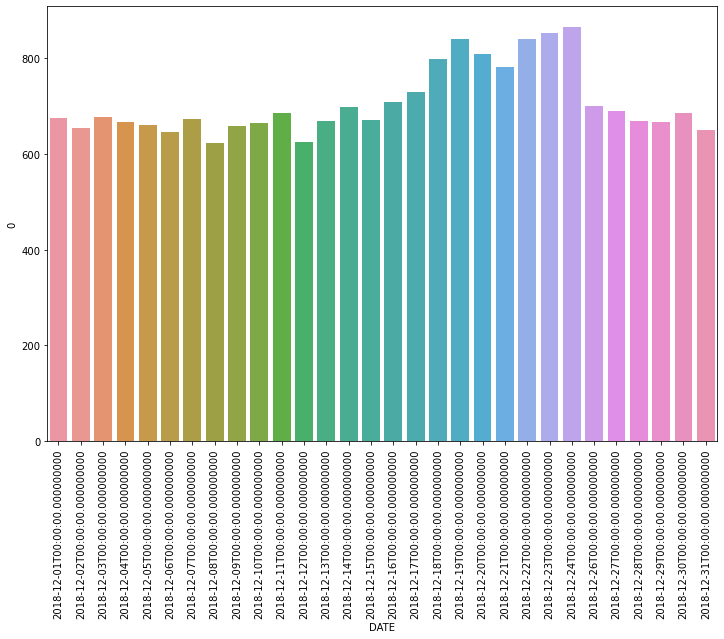

In [199]:
plt.figure(figsize=(12,8))
sns.barplot(data=d2,x='DATE',y=0)
plt.xticks(rotation=90)
plt.show()

Observation:We see that sales lead up to Christmas and there are no sales on Chirstmas due to shops being closed that day.

##### Exploring  pack size

In [256]:
#transaction['PROD_NAME'].unique()

In [201]:
transaction['PROD_NAME'].str.split(" ").str[-1].unique()

array(['SeaSalt175g', '175g', '170g', '150g', '330g', '210g', '210G',
       '270g', '220g', '125g', '110g', '134g', '150G', 'Chli&S/Cream175G',
       'Chckn175g', '380g', 'Chicken270g', '180g', '165g', 'Salt', '250g',
       'Chs&Onion170g', '200g', '160g', 'CutSalt/Vinegr175g', '190g',
       '90g', '70g'], dtype=object)

In [202]:
transaction['Pack_Size']=transaction['PROD_NAME'].str.extract('([0-9]\w{0,})',expand=True)

In [203]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g


In [204]:
transaction['Pack_Size'].unique()

array(['175g', '170g', '150g', '330g', '210g', '210G', '270g', '220g',
       '125g', '110g', '134g', '150G', '175G', '380g', '180g', '165g',
       '135g', '250g', '200g', '160g', '190g', '90g', '70g'], dtype=object)

Observation: g is represented as G in some cases

In [257]:
#transaction['Pack_Size'].replace('175G',value='175g')

In [206]:
transaction['Pack_Size']=transaction['Pack_Size'].replace('175G',value='175g')

In [207]:
transaction['Pack_Size']=transaction['Pack_Size'].replace('150G',value='150g')

In [208]:
transaction['Pack_Size']=transaction['Pack_Size'].replace('210G',value='210g')

In [209]:
transaction['Pack_Size'].unique()

array(['175g', '170g', '150g', '330g', '210g', '270g', '220g', '125g',
       '110g', '134g', '380g', '180g', '165g', '135g', '250g', '200g',
       '160g', '190g', '90g', '70g'], dtype=object)

Observation : Pack sizes seems sensible

##### Number of transactions per pack size

In [210]:
pack_df=transaction.groupby('Pack_Size').count()['TOT_SALES'].reset_index()

In [211]:
pack_df['num_split']=pack_df['Pack_Size'].str.split("g").str[0].astype(int)

In [212]:
pack_df=pack_df.sort_values('num_split')

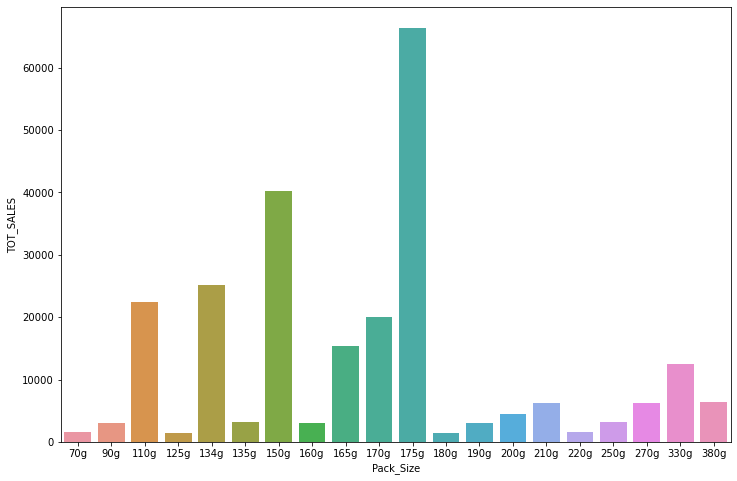

In [349]:
plt.figure(figsize=(12,8))
sns.barplot(data=pack_df,x='Pack_Size',y='TOT_SALES')

Observation: 175g is the most common Pack size sold

##### Brand name column creation

In [213]:
transaction['Brand_Name']=transaction['PROD_NAME'].str.split(" ").str[0]

In [214]:
transaction['Brand_Name'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [215]:
transaction[transaction['Brand_Name']=='French']['PROD_NAME'].unique()

array(['French Fries Potato Chips 175g'], dtype=object)

Observation : 1.Smiths has a duplicate name Smith
              2.Infuzions has a duplicate name  Infzns
              3.Red has a duplicate name RRD
              4.Doritos has a duplicate name Dorito
              5.SUnbites has a duplicate name Snbts

In [216]:
transaction['Brand_Name']=transaction['Brand_Name'].replace('Smith',value='Smiths')

In [217]:
transaction['Brand_Name']=transaction['Brand_Name'].replace('Infzns',value='Infuzions')

In [218]:
transaction['Brand_Name']=transaction['Brand_Name'].replace('RRD',value='Red')

In [219]:
transaction['Brand_Name']=transaction['Brand_Name'].replace('Dorito',value='Doritos')

In [220]:
transaction['Brand_Name']=transaction['Brand_Name'].replace('Snbts',value='Sunbites')

In [221]:
transaction['Brand_Name']=transaction['Brand_Name'].replace('Natural',value='Natural Chip Co')

In [222]:
transaction['Brand_Name']=transaction['Brand_Name'].replace('Grain',value='Grain Waves')

In [223]:
transaction['Brand_Name']=transaction['Brand_Name'].replace('French',value='French Fries')

Notes : Duplicate names were renamed. Brand Grain was renamed as Grain Waves. Natural was renamed as Natural Chip Co.
        French was renamed as French Fries.


In [224]:
transaction['Brand_Name'].unique()

array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'Red', 'Pringles', 'GrnWves', 'Tyrrells', 'Cobs',
       'French Fries', 'Tostitos', 'Cheetos', 'Woolworths', 'Sunbites'],
      dtype=object)

##### Examining Customer Data

In [225]:
customer.shape

(72637, 3)

Observation : Customer DataFrame has 72637 records


In [226]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


##### checking for null values

In [227]:
customer.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Observation: No nulls in the dataset

##### Checking for Duplicates

In [228]:
customer.duplicated().value_counts()

False    72637
dtype: int64

Observation: No Duplicate records in the customer data set

##### Exploring Columns

In [229]:
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [230]:
customer['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [231]:
customer['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

##### Distributions

In [232]:
customer['Premium_Map']=customer['PREMIUM_CUSTOMER'].map({'Premium':1,'Mainstream':2,'Budget':3})

In [233]:
customer['Lifestage_Map']=customer['LIFESTAGE'].map({'YOUNG SINGLES/COUPLES':1,'YOUNG FAMILIES':2,'OLDER SINGLES/COUPLES':3,'MIDAGE SINGLES/COUPLES':4,'NEW FAMILIES':5,'OLDER FAMILIES':6,'RETIREES':7})

In [234]:
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,Premium_Map,Lifestage_Map
0,1000,YOUNG SINGLES/COUPLES,Premium,1,1
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2,1
2,1003,YOUNG FAMILIES,Budget,3,2
3,1004,OLDER SINGLES/COUPLES,Mainstream,2,3
4,1005,MIDAGE SINGLES/COUPLES,Mainstream,2,4


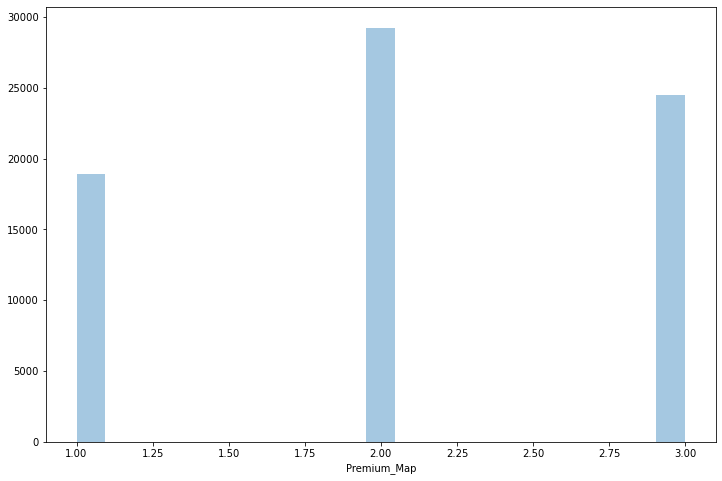

In [236]:
plt.figure(figsize=(12,8))
sns.distplot(customer['Premium_Map'],kde=False)
plt.show()

Observation : Majority of the customers belong to Mainstream Category

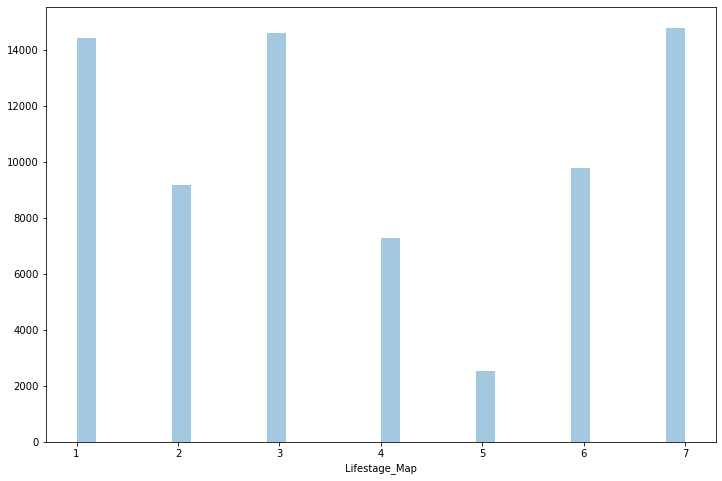

In [237]:
plt.figure(figsize=(12,8))
sns.distplot(customer['Lifestage_Map'],kde=False)
plt.show()

Observation : Majority of the customers are YOUNG FAMILIES,MIDAGE SINGLES/COUPLES,RETIREES

In [408]:
customer_summary=customer.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).count()['LYLTY_CARD_NBR'].reset_index()

In [413]:
customer_summary=customer_summary.rename(columns={'LYLTY_CARD_NBR':'COUNT'})

In [414]:
customer_summary.head()

,PREMIUM_CUSTOMER,LIFESTAGE,COUNT
0,Budget,MIDAGE SINGLES/COUPLES,1504
1,Budget,NEW FAMILIES,1112
2,Budget,OLDER FAMILIES,4675
3,Budget,OLDER SINGLES/COUPLES,4929
4,Budget,RETIREES,4454


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

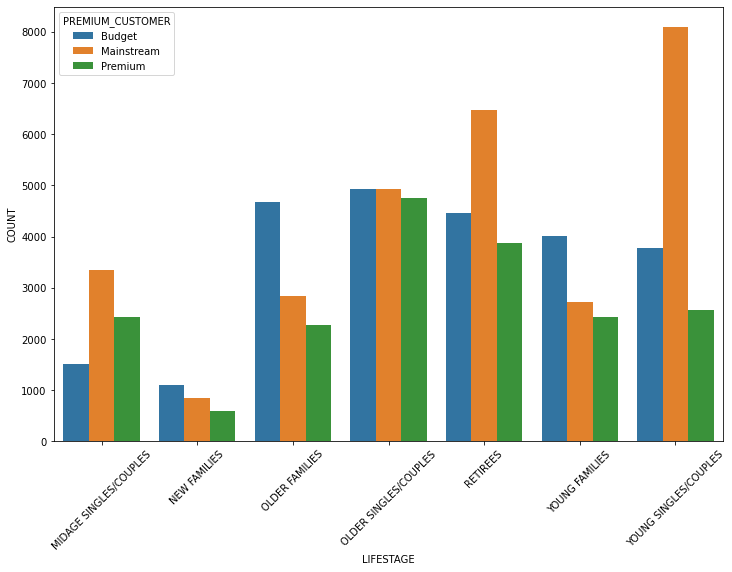

In [416]:
plt.figure(figsize=(12,8))
sns.barplot(data=customer_summary,x='LIFESTAGE',y='COUNT',hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)

Observation: Main stream Customers seem to be the majority in general

In [239]:
(customer.groupby('PREMIUM_CUSTOMER').count()['LYLTY_CARD_NBR']).sort_values(ascending=False)

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: LYLTY_CARD_NBR, dtype: int64

##### Merging Transaction and Customer Data

In [240]:
final=transaction.merge(customer,how='left',on='LYLTY_CARD_NBR')

In [241]:
final.shape

(246740, 14)

In [242]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   Pack_Size         246740 non-null  object        
 9   Brand_Name        246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
 12  Premium_Map       246740 non-null  int64         
 13  Lifestage_Map     246740 non-null  int64         
dtypes: d

In [243]:
final.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
Pack_Size           0
Brand_Name          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
Premium_Map         0
Lifestage_Map       0
dtype: int64

Observation: No null values. all the transactions have customer records

In [244]:
final.to_csv("C:/Users/visas/Downloads/Quantium/Final_Quantium.csv")

##### Exploratory Data Analysis

##### Total Sales

In [31]:
final=pd.read_csv("C:/Users/visas/Downloads/Quantium/Final_Quantium.csv")

In [245]:
round(final['TOT_SALES'].sum())

1805178

##### Which customer spends the most 

In [431]:
final.groupby('PREMIUM_CUSTOMER').sum()['TOT_SALES']

PREMIUM_CUSTOMER
Budget        631406.85
Mainstream    700865.40
Premium       472905.45
Name: TOT_SALES, dtype: float64

In [ ]:
total_sales_premium=(final.groupby('PREMIUM_CUSTOMER').sum()['TOT_SALES']/round(final['TOT_SALES'].sum()))*100

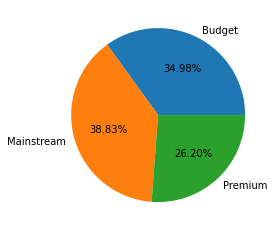

In [447]:
plt.pie(x=total_sales_premium.values,labels=total_sales_premium.index,autopct='%1.2f%%')
plt.show()

Observation:
Mainstream Customers spent the most with a total sales of 700865.40
Budget Customers were very close ,just behind by 3.85% spent a total of 631406.85

In [444]:
total_sales_lifestage=(final.groupby('LIFESTAGE').sum()['TOT_SALES']/round(final['TOT_SALES'].sum()))*100

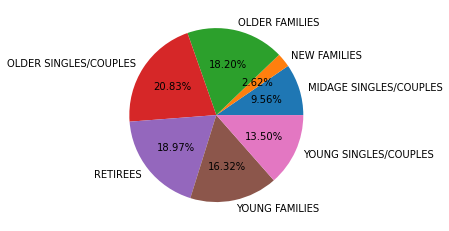

In [446]:
plt.pie(x=total_sales_lifestage.values,labels=total_sales_lifestage.index,autopct='%1.2f%%')
plt.show()

Observation: Older people spent more on chips than young and midage people

In [450]:
final.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],sort=True).sum()['TOT_SALES'].nlargest()

LIFESTAGE              PREMIUM_CUSTOMER
OLDER FAMILIES         Budget              156863.75
YOUNG SINGLES/COUPLES  Mainstream          147582.20
RETIREES               Mainstream          145168.95
YOUNG FAMILIES         Budget              129717.95
OLDER SINGLES/COUPLES  Budget              127833.60
Name: TOT_SALES, dtype: float64

Observation:  Majority sales are coming from Budget Older families,young families,older singles/couples and mainstream retirees,young/singles couples

In [454]:
final.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).sum()['TOT_SALES']

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget               33345.70
                        Mainstream           84734.25
                        Premium              54443.85
NEW FAMILIES            Budget               20607.45
                        Mainstream           15979.70
                        Premium              10760.80
OLDER FAMILIES          Budget              156863.75
                        Mainstream           96413.55
                        Premium              75242.60
OLDER SINGLES/COUPLES   Budget              127833.60
                        Mainstream          124648.50
                        Premium             123537.55
RETIREES                Budget              105916.30
                        Mainstream          145168.95
                        Premium              91296.65
YOUNG FAMILIES          Budget              129717.95
                        Mainstream           86338.25
                        Premium          

In [4]:
sales_group=final.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).sum()['TOT_SALES'].reset_index()

In [10]:
sales_group.head()

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70


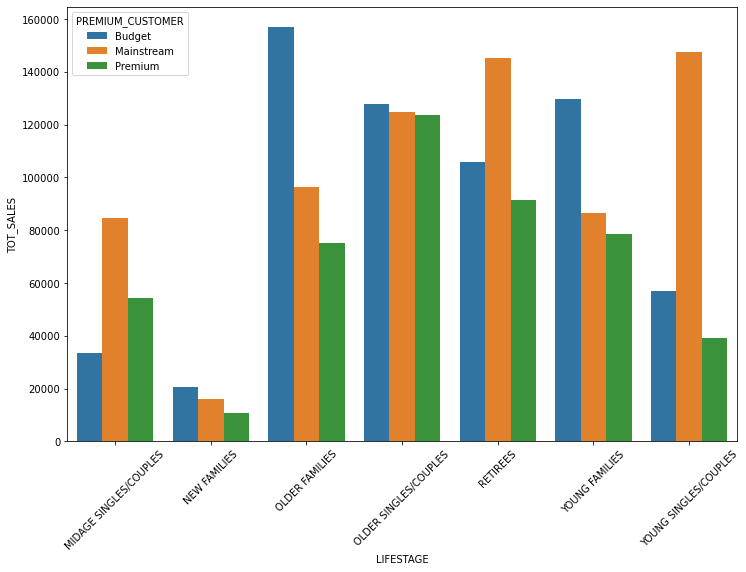

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(data=sales_group,x='LIFESTAGE',y='TOT_SALES',hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.show()

##### Number of customers who buy chips

In [467]:
final.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().nlargest()

LIFESTAGE              PREMIUM_CUSTOMER
OLDER FAMILIES         Budget              21514
RETIREES               Mainstream          19970
YOUNG SINGLES/COUPLES  Mainstream          19544
YOUNG FAMILIES         Budget              17763
OLDER SINGLES/COUPLES  Budget              17172
dtype: int64

Observation : More sales from a particular lifestage /premium_ customer group is beacause they are in large numbers

In [6]:
count_group=final.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().reset_index()

In [9]:
count_group.head()

,LIFESTAGE,PREMIUM_CUSTOMER,0
0,MIDAGE SINGLES/COUPLES,Budget,4691
1,MIDAGE SINGLES/COUPLES,Mainstream,11095
2,MIDAGE SINGLES/COUPLES,Premium,7612
3,NEW FAMILIES,Budget,2824
4,NEW FAMILIES,Mainstream,2185


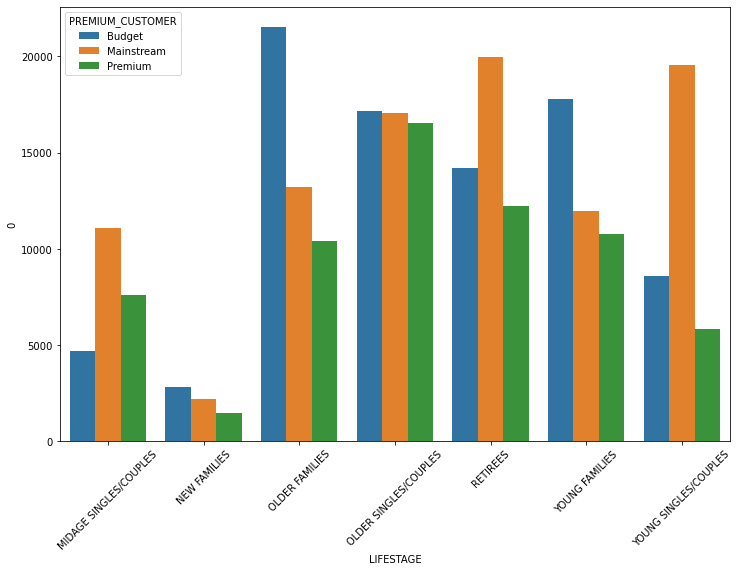

In [8]:
plt.figure(figsize=(12,8))
sns.barplot(data=count_group,x='LIFESTAGE',y=0,hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.show()

##### Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [12]:
final.head(1)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size,Brand_Name,LIFESTAGE,PREMIUM_CUSTOMER,Premium_Map,Lifestage_Map
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium,1,1


In [19]:
round(final.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).mean()['PROD_QTY'].nlargest(),2)

LIFESTAGE       PREMIUM_CUSTOMER
OLDER FAMILIES  Mainstream          1.95
                Premium             1.95
                Budget              1.95
YOUNG FAMILIES  Mainstream          1.94
                Budget              1.94
Name: PROD_QTY, dtype: float64

Observation: Older families and young families in general buy more chips per customer.

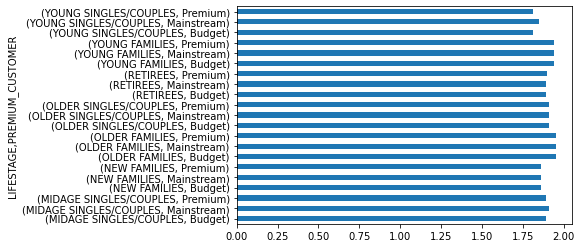

In [3]:
round(final.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).mean()['PROD_QTY'],2).plot(kind='barh')
plt.show()

##### Average price per unit chips for each customer segment

In [49]:
final['Unit_Price']=final['TOT_SALES']/final['PROD_QTY']

In [5]:
final.head(1)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size,Brand_Name,LIFESTAGE,PREMIUM_CUSTOMER,Premium_Map,Lifestage_Map,Unit_Price
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium,1,1,3.0


In [28]:
round(final.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).mean()['Unit_Price'],2).nlargest()

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          4.07
MIDAGE SINGLES/COUPLES  Mainstream          3.99
NEW FAMILIES            Budget              3.92
                        Mainstream          3.92
RETIREES                Budget              3.92
Name: Unit_Price, dtype: float64

Observation: Mainstream young singles/couples and midage singles/couples are willing to spend more per packet of chips.

In [35]:
round(final.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'Unit_Price':'mean','LYLTY_CARD_NBR':'count'}),2)

Unit_Price  LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                            
MIDAGE SINGLES/COUPLES Budget                  3.74            4691
                       Mainstream              3.99           11095
                       Premium                 3.77            7612
NEW FAMILIES           Budget                  3.92            2824
                       Mainstream              3.92            2185
                       Premium                 3.87            1488
OLDER FAMILIES         Budget                  3.75           21514
                       Mainstream              3.74           13241
                       Premium                 3.72           10403
OLDER SINGLES/COUPLES  Budget                  3.88           17172
                       Mainstream              3.81           17061
                       Premium                 3.89           16560
RETIREES               Budget                  3.92           14225
                       Mainstream              3.84           19970
                       Premium                 3.92           12236
YOUNG FAMILIES         Budget                  3.76           17763
                       Mainstream              3.72           11947
                       Premium                 3.76           10784
YOUNG SINGLES/COUPLES  Budget                  3.66            8573
                       Mainstream              4.07           19544
                       Premium                 3.67            5852

observation: Main stream Young singles/coulples , Main stream Midage singles/couples are willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being likely to buy more healthy snacks, and when they buy chips, this is mainly for entertainment purposes ,rather than for their own consumption.This is also supported by there being fewer premium midage and young singles and 
couples buying chips compared to their mainstream counterparts.

##### Statistically checking the difference in average unit price

In [50]:
# filtering  main stream young singles/couples
mainstream_group=final[(final['PREMIUM_CUSTOMER']=='Mainstream')& ((final['LIFESTAGE']=='YOUNG SINGLES/COUPLES')|(final['LIFESTAGE']=='MIDAGE SINGLES/COUPLES'))]

In [51]:
# filtering premium and budget young singles/couples
premiumbudget_group=final[(final['PREMIUM_CUSTOMER']!='Mainstream')& ((final['LIFESTAGE']=='YOUNG SINGLES/COUPLES')|(final['LIFESTAGE']=='MIDAGE SINGLES/COUPLES'))]

In [55]:
len(premiumbudget_group)

26728

In [44]:

from scipy import stats


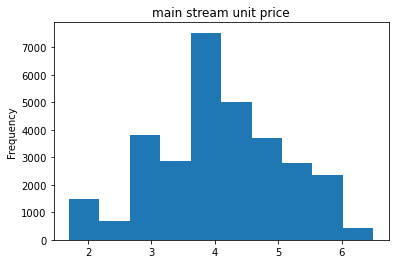

In [53]:
mainstream_group['Unit_Price'].plot(kind="hist", title="main stream unit price")
plt.show()

In [56]:
# Distribution of two groups

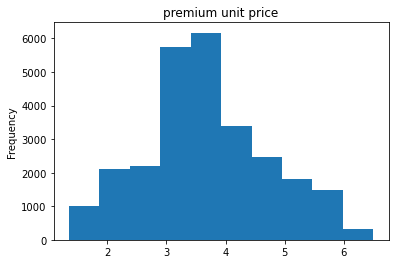

In [54]:
premiumbudget_group['Unit_Price'].plot(kind="hist", title="premium unit price")
plt.show()

In [57]:
# Levene's test to check variances between two groups
stats.levene(mainstream_group['Unit_Price'],premiumbudget_group['Unit_Price'])

LeveneResult(statistic=162.6188653399757, pvalue=3.404521984806103e-37)

 Observation :Levene result is significant saying the variances are not equal . So we proceed with welch's T test

##### Welch's T test

In [58]:
stats.ttest_ind(mainstream_group['Unit_Price'],premiumbudget_group['Unit_Price'],equal_var=False)

Ttest_indResult(statistic=37.6243885962295, pvalue=6.967354233018139e-306)

In [59]:
mainstream_group['Unit_Price'].describe()

count    30639.000000
mean         4.039786
std          1.012012
min          1.700000
25%          3.300000
50%          3.800000
75%          4.600000
max          6.500000
Name: Unit_Price, dtype: float64

In [60]:
premiumbudget_group['Unit_Price'].describe()

count    26728.000000
mean         3.706491
std          1.097259
min          1.350000
25%          3.000000
50%          3.700000
75%          4.400000
max          6.500000
Name: Unit_Price, dtype: float64

Observation :The t-test results in a p-value of 6.967354233018139e-306, i.e. the unit price for mainstream, young and mid-age singles and couples ARE  significantly higher than that of premium/budget, young and midage singles and couples.The average unit price in mainstream young singles/couples and midage singles/couple has a mean of 4.04 with a sd of 1.01 .The average unit price in premium/budget young singles/couples and midage singles/couple has a mean of 3.71 with a sd of 1.09 . 



##### Brand Affinity  of  mainstream young singles/couples compared to the rest of the population

In [62]:
segment1=final[(final['LIFESTAGE']=='YOUNG SINGLES/COUPLES')& (final['PREMIUM_CUSTOMER']=='Mainstream')]

In [63]:
other=final[(final['LIFESTAGE']!='YOUNG SINGLES/COUPLES')& (final['PREMIUM_CUSTOMER']!='Mainstream')]

In [65]:
quantity_segment1=segment1['PROD_QTY'].sum()

In [67]:
quantity_other=other['PROD_QTY'].sum()

In [69]:
quantity_segment1

36225

In [76]:
segment1_proportion=(segment1.groupby('Brand_Name').sum()['PROD_QTY']/quantity_segment1).reset_index()

In [79]:
segment1_proportion=segment1_proportion.rename(columns={'PROD_QTY':'TARGET_SEGMENT'})

In [84]:
other_proportion=(other.groupby('Brand_Name').sum()['PROD_QTY']/quantity_other).reset_index()

In [85]:
other_proportion=other_proportion.rename(columns={'PROD_QTY':'Other'})

In [89]:
merged=segment1_proportion.merge(other_proportion,how='left',on='Brand_Name')

In [91]:
merged['Affinity_Index']=(merged['TARGET_SEGMENT']/merged['Other'])*100

In [106]:
merged=merged.sort_values(by='Affinity_Index',ascending=False)

In [107]:
merged

,Brand_Name,TARGET_SEGMENT,Other,Affinity_Index
20,Tyrrells,0.031553,0.025715,122.702520
19,Twisties,0.046184,0.037933,121.750566
5,Doritos,0.122761,0.101171,121.339683
10,Kettle,0.197985,0.166560,118.866664
18,Tostitos,0.045411,0.038350,118.409999
13,Pringles,0.119420,0.101110,118.108984
7,Grain Waves,0.029124,0.024891,117.002020
4,Cobs,0.044638,0.038449,116.095856
9,Infuzions,0.064679,0.057410,112.662167
17,Thins,0.060373,0.057159,105.621715


Observation:Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population
• Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population


##### Pack size Preference of mainstream young singles/couples compared to the rest of the population

In [98]:
segment_packsize_proportion=(segment1.groupby('Pack_Size').sum()['PROD_QTY']/quantity_segment1).reset_index()

In [100]:
segment_packsize_proportion=segment_packsize_proportion.rename(columns={'PROD_QTY':'Target_Segment'})

In [101]:
other_packsize_proportion=(other.groupby('Pack_Size').sum()['PROD_QTY']/quantity_other).reset_index()

In [102]:
other_packsize_proportion=other_packsize_proportion.rename(columns={'PROD_QTY':'Other'})

In [103]:
merged_packsize=segment_packsize_proportion.merge(other_packsize_proportion,how='left',on='Pack_Size')

In [104]:
merged_packsize['Affinity_Index']=(merged_packsize['Target_Segment']/merged_packsize['Other'])*100

In [105]:
merged_packsize.sort_values(by='Affinity_Index',ascending=False)

,Pack_Size,Target_Segment,Other,Affinity_Index
15,270g,0.031829,0.025070,126.960826
17,380g,0.032160,0.025711,125.082706
16,330g,0.061284,0.050974,120.224331
0,110g,0.106280,0.089575,118.649160
2,134g,0.119420,0.101110,118.108984
12,210g,0.029124,0.024891,117.002020
3,135g,0.014769,0.012931,114.208633
14,250g,0.014355,0.012863,111.595937
7,170g,0.080773,0.080347,100.529991
4,150g,0.157598,0.163070,96.644867


 Observation:It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips
compared to the rest of the population.

##### Which brand sells a pack size with 270 g?

In [111]:
segment1[segment1['Pack_Size']=='270g']['PROD_NAME'].unique()

array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

Observation:
Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.

##### Conclusion


1.Budget older families, Mainstream young singles/couples contribute most to sales.<br/>
2.This higher sales due to there are more of them compared to other buyers.<br/>
3.Mainstream young singles/couples and midage singles/couples pay more per unit .<br/>
4.Mainstream young singles/couples are 23% more likely to purchase Tyrell's chips compared to other brands.

